In [4]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import tarfile
import urllib

#!pip install seaborn
#!pip install yellowbrick
#!pip install bertopic
#!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

from IPython.display import clear_output

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from pandas.api.types import CategoricalDtype
import scipy
!pip install openpyxl
import openpyxl


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You should consider upgrading via the 'C:\Users\oskar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


https://medium.com/@dennisndungu68/text-classification-using-k-means-33bea24e4a94

https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python

https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a


In [2]:
df = pd.read_csv(r'master.csv')

In [3]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')

#data = vectorizer.fit_transform(df["clean_abstract"]).toarray()

'''
Istedenfor å bruke tfidf-vektorer, bruker vi embeddings lagd av bert
'''


NameError: name 'TfidfVectorizer' is not defined

In [280]:
def chooseNumber(string, r):
    try:
        number = input(string)
        if number == "":
            return number
        if int(number) in r:
            return int(number)
        else:
            chooseNumber(string, r)
    except:
        print("invalid input")
        chooseNumber(string, r)

def find_article(searchinfo,df):
    df_search = pd.DataFrame()
    for search in searchinfo:
        count = 0
        for title in df['title']:
            if search[0] == title:
                df_search = pd.concat([df_search,df[count:count+1]], ignore_index = True)
            count = count + 1
    for x,y in zip (df_search['title'], df_search.iloc[:,-1:].iterrows()):
        print(x,y[1][0])

def embed(data):
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        embeddings = model.encode(data, show_progress_bar= True)
        #np.save('embeddings.npy', embeddings)
        return embeddings


def kmeans(dataframe, cluster_range, iteration):
    fig, ax = plt.subplots(5, 2, figsize=(25,10))
    silhouette_avg = []
    sse = []
    labels = {}
    print("dataframe shape: ", dataframe.shape)
    embeddings = embed(dataframe['clean_abstract'])
    #embeddings = np.load('embeddings.npy')
  


    for i in cluster_range:
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42).fit(embeddings)
        q, mod = divmod(i, 2)
        # Examine silhuette scores
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(embeddings)
        # use SSE for elbow method
        sse.append(km.inertia_)
        #silhouette score
        ss = silhouette_score(embeddings, km.labels_)
        silhouette_avg.append(ss)
        # Display which iteration we are on
        print(i, " no. of clusters yields an average silhuette score of: ", ss)
        # Store labels
        labels[i] = km.labels_
    
    # DISPLAY ELBOW AND SILHUETTE
    print("Choose approperiate no. of clusters")

    plt.show()
    print("Remember that you should choose cluster size so that the clusters are relatively equal in size")
    plt.plot([0, 0] + silhouette_avg)
    plt.show()
    plt.plot([0, 0] + sse)
    plt.show()
    
    # SELECT APPROPERIATE NO. OF CLUSTERS
    no_of_clusters = chooseNumber("How many clusters? "+str(cluster_range), cluster_range)
    if no_of_clusters == "":
        return 0
    
    # ADD A COLUMN TO DATAFRAME WITH LABELS FROM CHOSEN NO. OF CLUSTERS
    current_col = "km_"+str(iteration)
    dataframe[current_col] = labels[no_of_clusters]
    clear_output(wait=True)
    # VISUALIZE EACH CLUSTER
    print("Choose which cluster to follow")
    try:
        find_article([['Are there social limits to adaptation to climate change?',2009.0],
            ['Limits to adaptation to climate change: a risk approach',2013.0],
            ['Explaining and overcoming barriers to climate change adaptation',2014.0],
            ['Contrasting perspectives on barriers to adaptation in Australian climate change policy',2014.0],
            ['From barriers to limits to climate change adaptation: path dependency and the speed of change',2015.0],
            ['A systematic global stocktake of evidence on human adaptation to climate change',2021.0],
            ['Mapping the evolution and current trends in climate change adaptation science',2021.0],
            ['Climate Change Adaptation on Small Island States: An Assessment of Limits and Constraints',2021.0],
            ['Limits to adaptation: Building an integrated research agenda',2022.0],
            ['A framework to diagnose barriers to climate change adaptation', 2010.0],
            ['Limits to adaptation', 2013.0],
            ['Everyday limits to adaptation', 2022.0]
            ], dataframe)
    except:
        print('NO ARTICLES IN CLUSTER')
  
    topic_model = BERTopic()
    

    for x in dataframe[current_col].unique():
        topic_df = dataframe[dataframe[current_col] == x].reset_index()
        cluster_df = topic_df[['title','wos', 'clean_abstract']]
        cluster_df.to_csv('../cluster_project/clusters/cluster 0.0.1.1.1.1.'+str(x)+'.csv')

    
        topic, probs = topic_model.fit_transform(cluster_df['clean_abstract'])
        
        topic_results = pd.DataFrame()
        topic_results['Topic'] = topic_model.get_topic_info()['Topic']            
        topic_results['Count'] = topic_model.get_topic_info()['Count']
        topic_results['Name'] = topic_model.get_topic_info()['Name']
        
        topics_dict = topic_model.get_topics()
        topics =pd.DataFrame.from_dict(topics_dict)
        result = pd.concat([topic_results, topics], axis=1)
        result.to_csv('../cluster_project/sixth level/0.0.1.1.1.1.'+str(x)+'.csv')
        
        
    


"""
    # CHOOSE WHICH CLUSTER TO FOLLOW
    chosen_cluster = chooseNumber("Which cluster567? "+str(range(0, no_of_clusters-1)), range(0, no_of_clusters))
    new_df = dataframe[dataframe[current_col] == chosen_cluster]
    clear_output(wait=True)
    kmeans(new_df, cluster_range, iteration+1)

def main():
    
    #embeddings = np.load(r'embeddings_clean_context.npy') # choose correct embeddings
    range_no_clusters = [2,3,4,5,6,7,8,9,10] # 5, 6, 7, 8, 9, 10, 11]
    # cluster_algorithm = input("choose algorithm: km, ac, or hc")
    cluster_algorithm = "km"
   
    df.iat[2489,2] = 2022.0
    df['year'] = df['year'].astype(str)
    
        

    if cluster_algorithm == "km":
        kmeans(df, range_no_clusters, 0)

    if cluster_algorithm == "ac":
        return 0
    
    if cluster_algorithm == "hc":
        return 0
    
    else:
        print("Enter a valid algorithm")
        main()
"""

'\n    # CHOOSE WHICH CLUSTER TO FOLLOW\n    chosen_cluster = chooseNumber("Which cluster567? "+str(range(0, no_of_clusters-1)), range(0, no_of_clusters))\n    new_df = dataframe[dataframe[current_col] == chosen_cluster]\n    clear_output(wait=True)\n    kmeans(new_df, cluster_range, iteration+1)\n\ndef main():\n    \n    #embeddings = np.load(r\'embeddings_clean_context.npy\') # choose correct embeddings\n    range_no_clusters = [2,3,4,5,6,7,8,9,10] # 5, 6, 7, 8, 9, 10, 11]\n    # cluster_algorithm = input("choose algorithm: km, ac, or hc")\n    cluster_algorithm = "km"\n   \n    df.iat[2489,2] = 2022.0\n    df[\'year\'] = df[\'year\'].astype(str)\n    \n        \n\n    if cluster_algorithm == "km":\n        kmeans(df, range_no_clusters, 0)\n\n    if cluster_algorithm == "ac":\n        return 0\n    \n    if cluster_algorithm == "hc":\n        return 0\n    \n    else:\n        print("Enter a valid algorithm")\n        main()\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      202 non-null    int64 
 1   title           202 non-null    object
 2   wos             202 non-null    object
 3   clean_abstract  202 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB
dataframe shape:  (202, 4)


KeyboardInterrupt: 

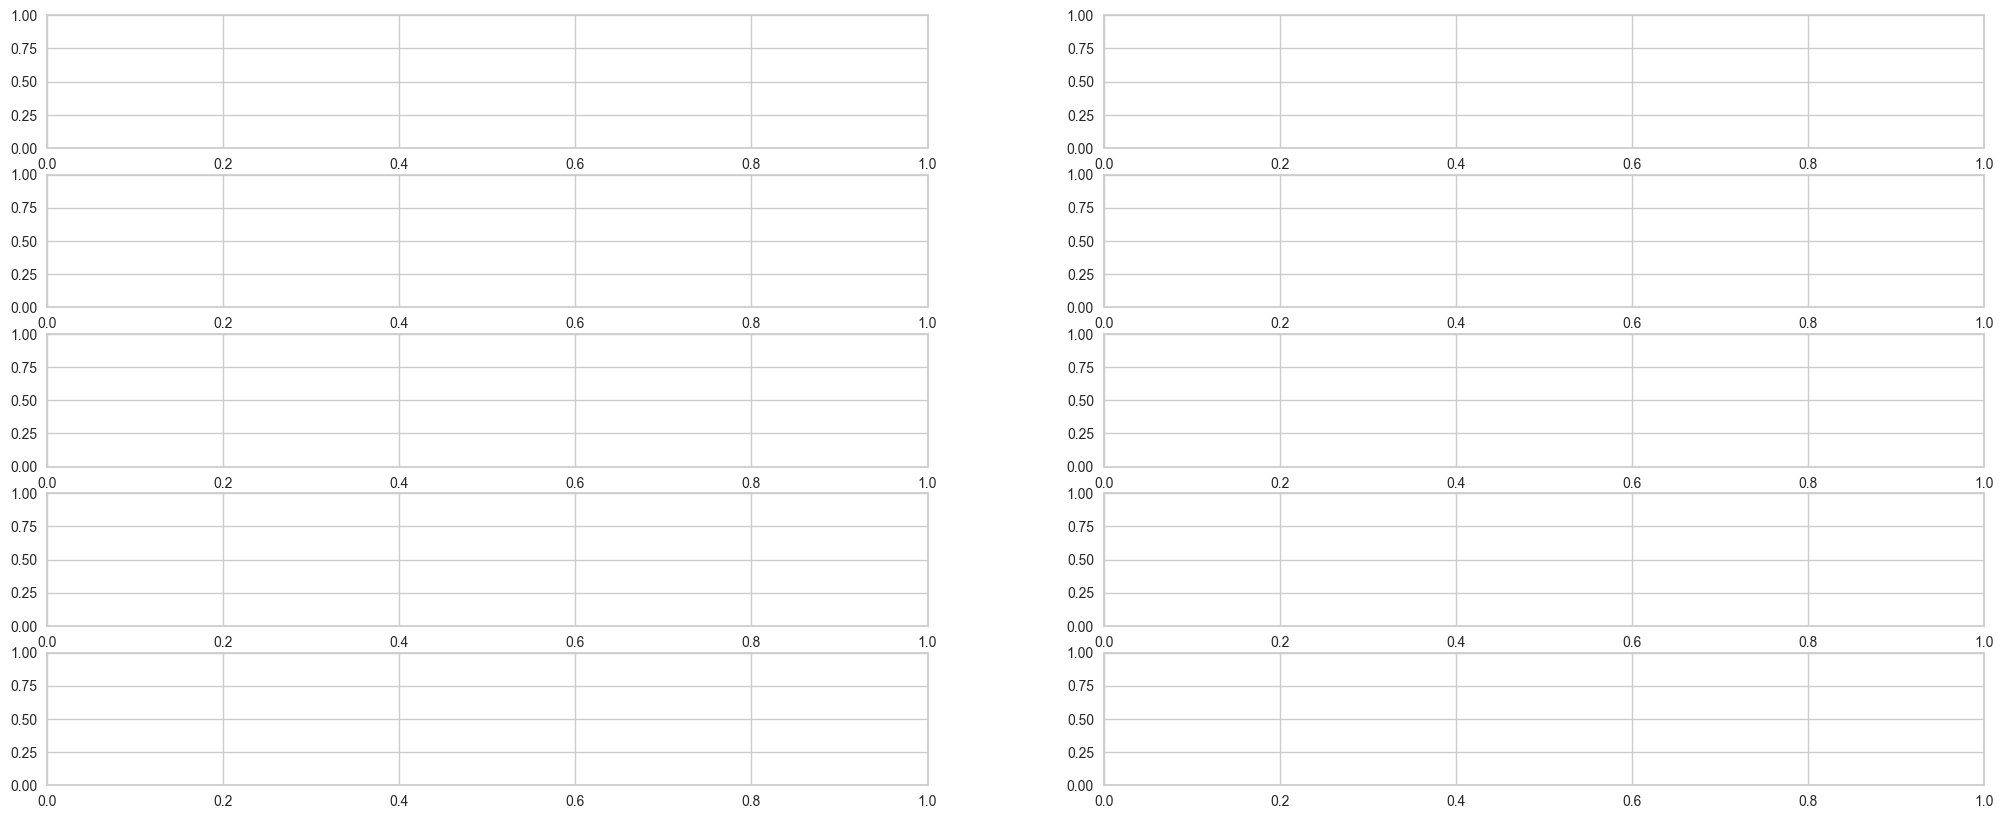

In [284]:
def main():
    df = pd.read_csv('../cluster_project/clusters/cluster 0.0.1.1.1.1.2.csv')
    range_no_clusters = [2,3,4,5,6,7,8,9,10]
    df.info()
    kmeans(df, range_no_clusters, 0)

main()



In [68]:
df

,Unnamed: 0,Topic,Count,Name,0,1
0,0,0.0,749.0,0_policy_risk_approach_process,"('policy', 0.04004625533313867)","('health', 0.39351537264102465)"
1,1,1.0,17.0,1_health_public_impact_risk,"('risk', 0.03068600210943076)","('public', 0.10435878082097699)"
2,2,NaN,NaN,NaN,"('approach', 0.028765896142583982)","('impact', 0.06838863337567515)"
3,3,NaN,NaN,NaN,"('process', 0.028234962137383194)","('risk', 0.06014642282735554)"
4,4,NaN,NaN,NaN,"('decision', 0.02629608814915761)","('framework', 0.047471711405608824)"
5,5,NaN,NaN,NaN,"('social', 0.0246884580248308)","('approach', 0.04366429120456622)"
6,6,NaN,NaN,NaN,"('development', 0.0242512892992729)","('human', 0.04188801055097115)"
7,7,NaN,NaN,NaN,"('impact', 0.023964435890694195)","('sector', 0.041773735782696685)"
8,8,NaN,NaN,NaN,"('local', 0.023357420956378366)","('community', 0.03877878803724629)"
9,9,NaN,NaN,NaN,"('level', 0.022904685328318675)","('related', 0.03834100248381943)"
